In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob
from tensorflow import keras
import matplotlib.pyplot as plt

from e1_data_generator import DataGenerator
from utils import tf_visualize_depth_map
from metrics import Metric

In [2]:
model = keras.models.load_model('checkpoint/model_1653373548.903842/')

In [3]:
HEIGHT = 256
WIDTH = 256
LR = 0.0002
EPOCHS = 100
BATCH_SIZE = 32

df = pd.read_csv('data_df.csv')

In [ ]:
# test_loader = next(
#     iter(DataGenerator(data=df[265:].reset_index(drop="true"),
#                        batch_size=6, dim=(HEIGHT, WIDTH)))
# )
# visualize_depth_map(test_loader, test=True, model=model)

In [5]:
test_loader = DataGenerator(
    data=df[260:].reset_index(drop="true"), batch_size=16, dim=(HEIGHT, WIDTH)
)
df[260:].shape

(65, 3)

In [6]:
evaluation_metrics = {'mean_absrel': [], 'mean_sqrel': [], 'rms': [], 'rms_log': [], 'delta1': [], 'delta2': [], 'delta3': []}
for samples in test_loader:
    inp, target = samples
    pred = model.predict(inp)
    for i in range(len(inp)):
        metric = Metric(target[i], pred[i])
        evaluation_metrics['mean_absrel'].append(metric.mean_absrel_err())
        evaluation_metrics['mean_sqrel'].append(metric.mean_sqrel_err())
        evaluation_metrics['rms'].append(metric.rms_err())
        evaluation_metrics['rms_log'].append(metric.rms_log_err())
        evaluation_metrics['delta1'].append(metric.percentage_of_pixel_acc()['delta1'])
        evaluation_metrics['delta2'].append(metric.percentage_of_pixel_acc()['delta2'])
        evaluation_metrics['delta3'].append(metric.percentage_of_pixel_acc()['delta3'])

In [7]:
res_df = pd.DataFrame(evaluation_metrics)
res_df.mean()

mean_absrel    0.879676
mean_sqrel     0.609807
rms            0.509792
rms_log        1.842245
delta1         0.472195
delta2         0.704021
delta3         0.804016
dtype: float64

/Users/chientm/workspace/machine-learning/depth_estimation/utils.py:28: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  cmap.set_bad(color="black")


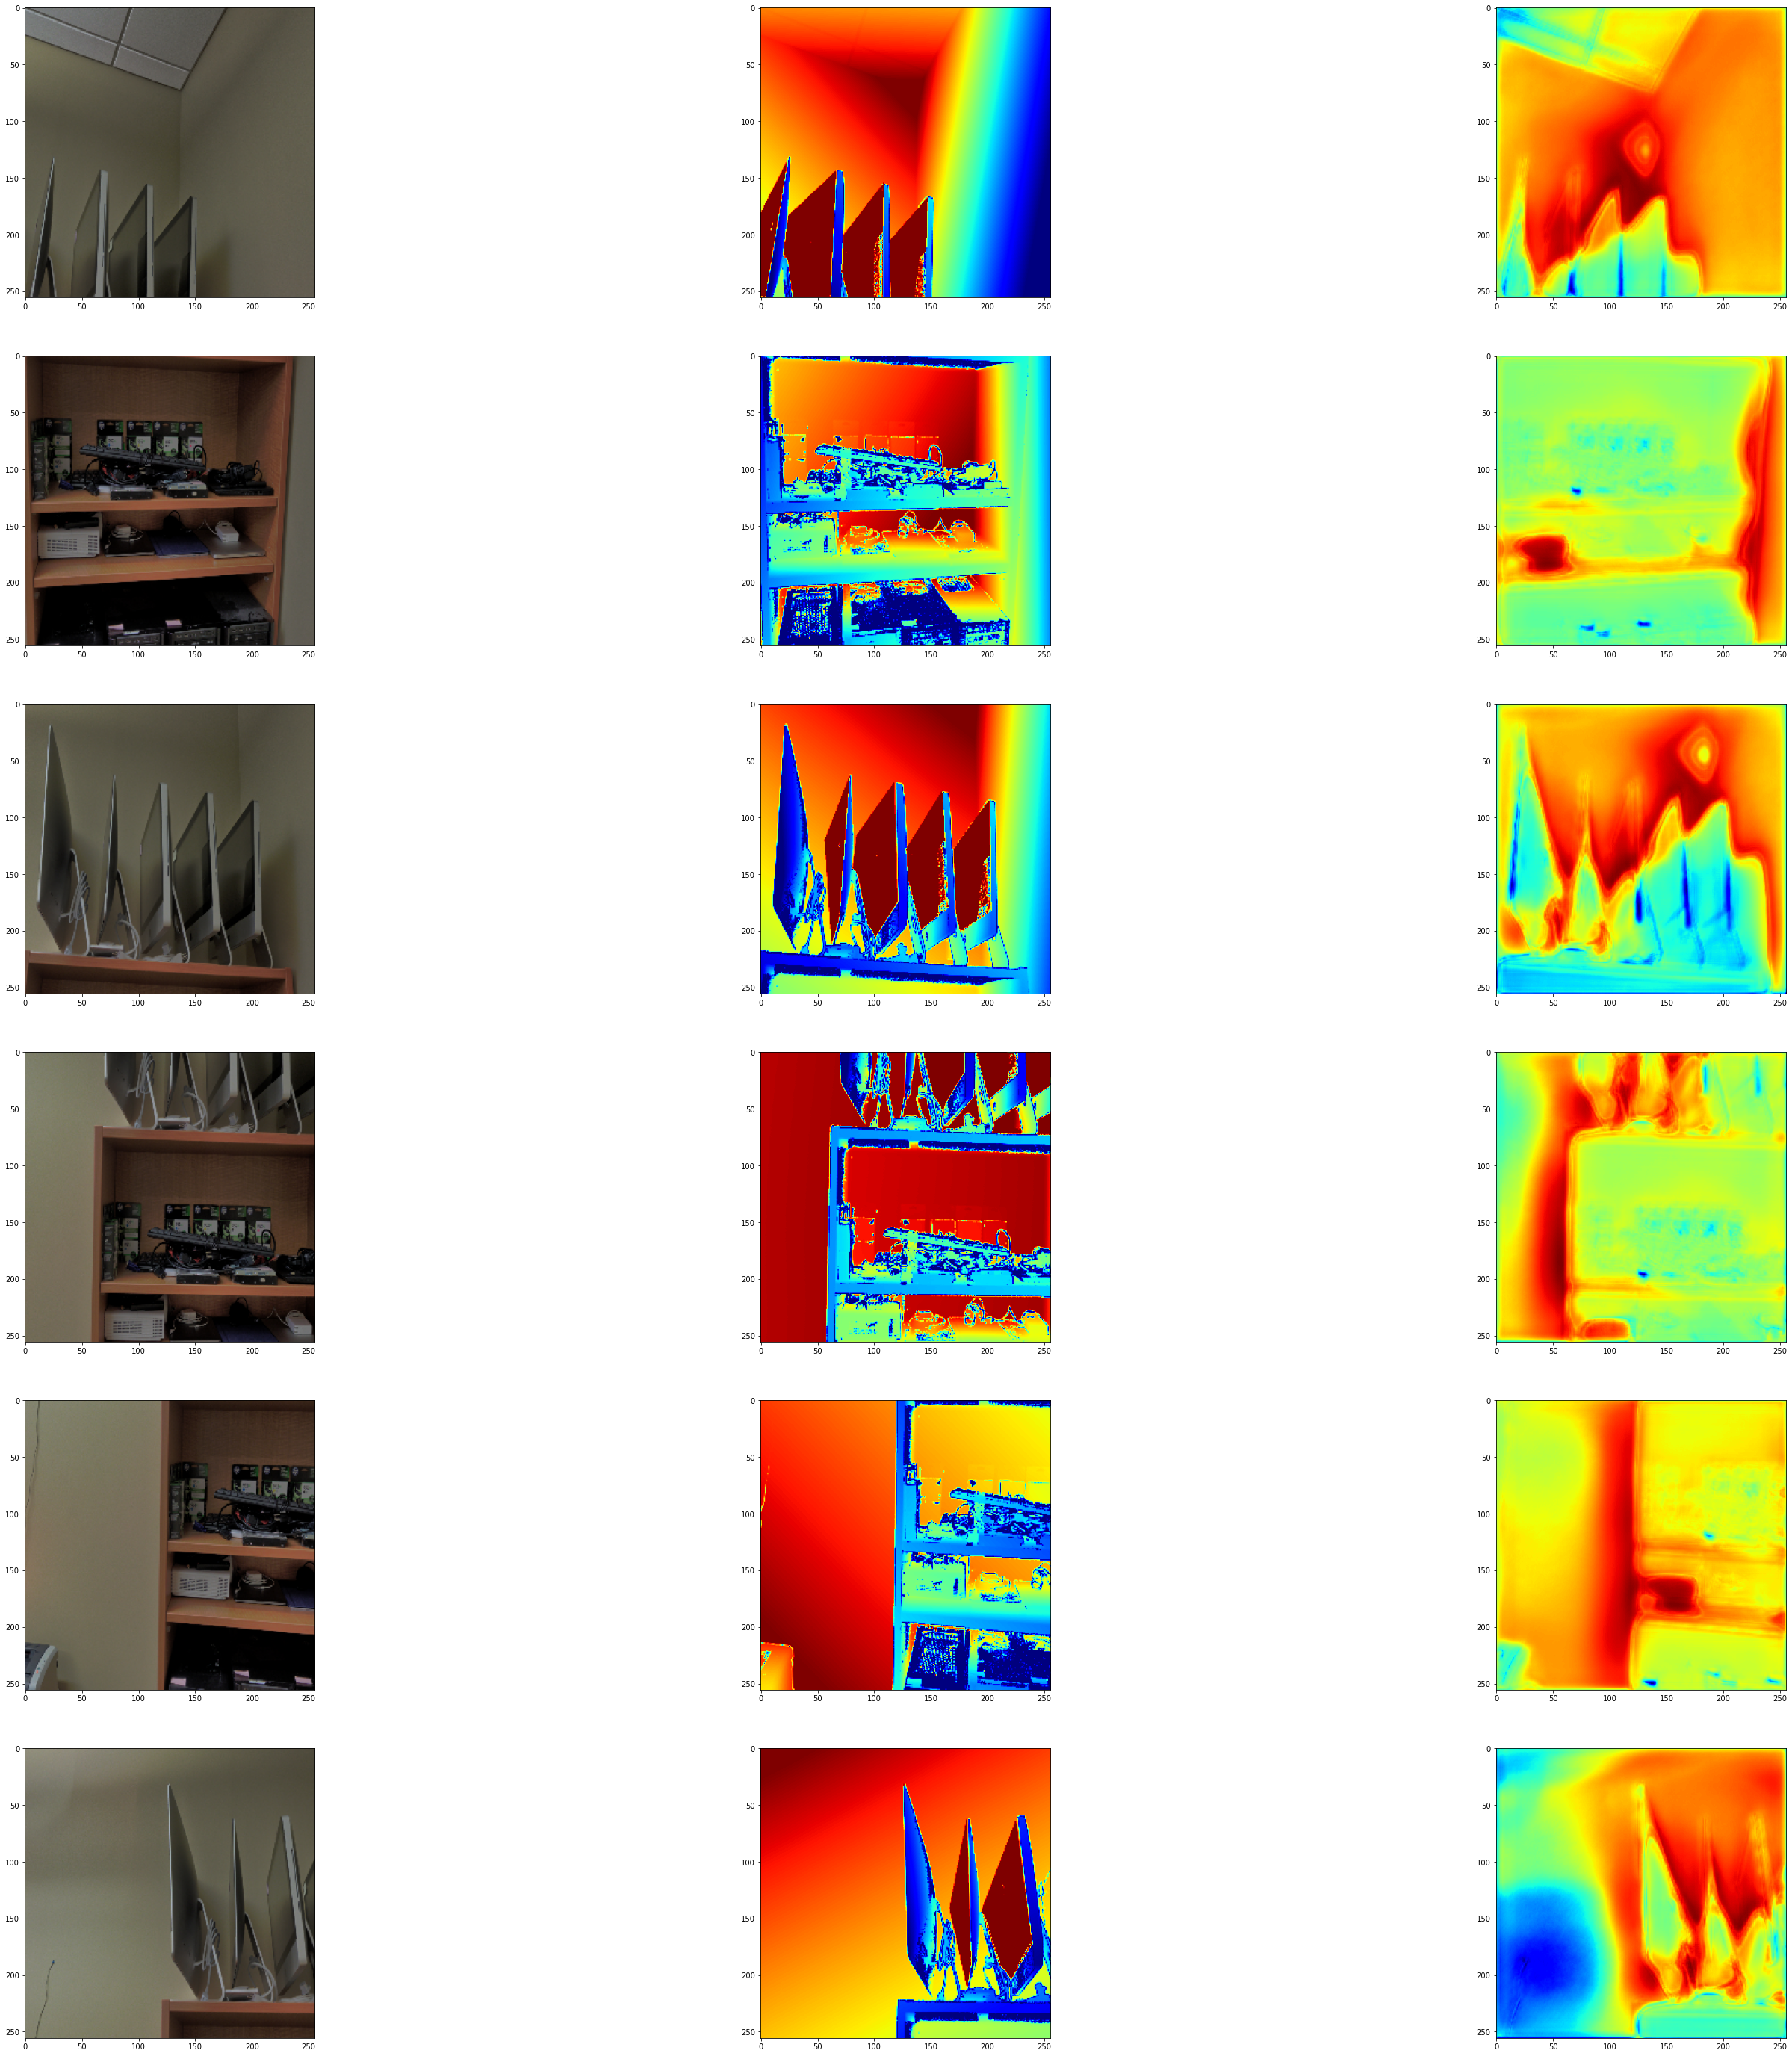

In [4]:
test_vis_loader = DataGenerator(
    data=df[260:].reset_index(drop="true"), batch_size=6, dim=(HEIGHT, WIDTH)
)
tf_visualize_depth_map(
    next(iter(test_vis_loader)), test=True, model=model
)